## 비지도 학습
- 정답이 없는 데이터를 학습해서 패턴, 특징을 파악
- 데이터를 새롭게 표현해서 ML이 원래 데이터보다 쉽게 해석할 수 있도록 만듦
- 차원 축소
    - 특성이 너무 많아도 과대 적합이 될수 있음
    - 특성(자원)을 줄여서 종부를 축약
- 군집
    - 라벨링에 도움이 됨
    - 비슷한 데이터들끼리 묶어줌

## 차원 축소

In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mglearn

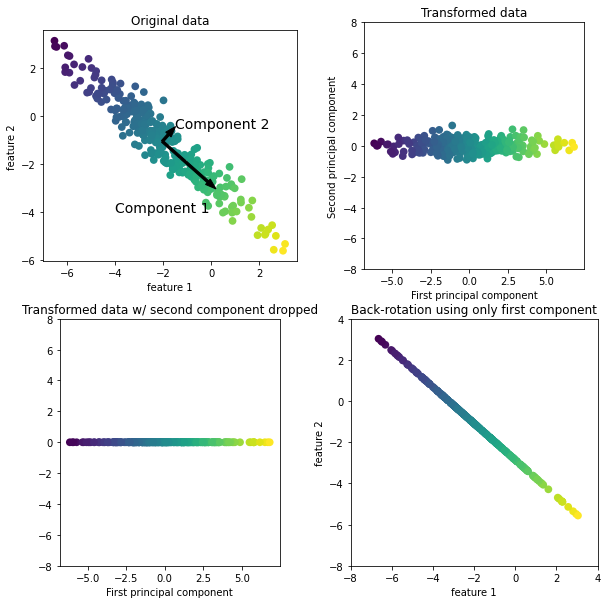

In [3]:
# PCA(주성분 분석)
# Principal Component Analysis
# 장점 : 머심러닝이 판단을 잘 하게 만들어 줄 수 있음
# 단점 : 축이 어디있는지 판단 힘듦, 축을 해석하기가 힘듦
mglearn.plots.plot_pca_illustration()

## IRIS

### Import library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris Data Load

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

### PCA 활용 4차원 >> 2차원 축소

#### Load PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

#### 학습

In [8]:
pca.fit(X)

PCA(n_components=2)

#### 차원 축소

In [9]:
pcaX = pca.transform(X)

#### 시각화

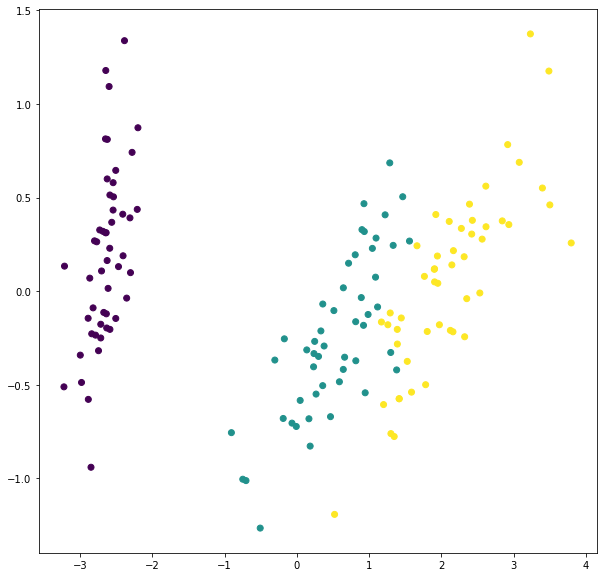

In [10]:
plt.figure(figsize=(10,10))
# 산점도
plt.scatter(pcaX[:,0], # 축소된 0번 컬럼
            pcaX[:,1], # 축소된 1번 컬럼
            c = y) 
plt.show()

## Human Data

### Human Data Load

In [11]:
from sklearn.datasets import fetch_lfw_people

In [12]:
people = fetch_lfw_people(min_faces_per_person = 200, resize = 0.7)

In [13]:
people.data.shape

(766, 5655)

In [14]:
people.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [15]:
people.target_names

array(['Colin Powell', 'George W Bush'], dtype='<U13')

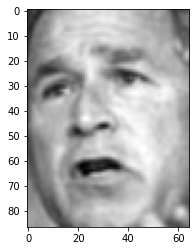

In [17]:
plt.imshow(people.images[500] , cmap = 'gray')